# Predicting & Visualising Customer Churning

#### This notebook aims to explore different features in this data, and use them to predict whether a customer will leave the credit card company or not.

#### Importing required packages

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

#### Loading data in dataframe

In [2]:
df1 = pd.read_csv('BankChurners.csv')
df1.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


#### Insights on the data

In [3]:
df1.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [4]:
df2 = df1.drop(columns = ['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [5]:
df2.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [7]:
df2.head(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [8]:
df2.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
df2.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [10]:
df2.head(2)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [12]:
df2.Income_Category.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [13]:
df2.columns[df2.dtypes == 'object']

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [14]:
Gender_n = pd.get_dummies(df2['Gender'])

In [15]:
Education_Level_n = pd.get_dummies(df2['Education_Level'],drop_first = True)

In [16]:
Marital_Status_n = pd.get_dummies(df2['Marital_Status'],drop_first = True)

In [17]:
Income_Category_n = pd.get_dummies(df2['Income_Category'],drop_first = True)

In [18]:
Card_Category_n = pd.get_dummies(df2['Card_Category'],drop_first = True)

In [19]:
df3 = pd.concat([df2,Gender_n,Education_Level_n,Marital_Status_n,Income_Category_n,Card_Category_n],axis = 1)

In [20]:
df3.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'F',
       'M', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
       'Uneducated', 'Unknown', 'Married', 'Single', 'Unknown', '$40K - $60K',
       '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Unknown', 'Gold',
       'Platinum', 'Silver'],
      dtype='object')

In [21]:
df3.drop(columns = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category'],inplace = True)

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Months_on_book            10127 non-null  int64  
 4   Total_Relationship_Count  10127 non-null  int64  
 5   Months_Inactive_12_mon    10127 non-null  int64  
 6   Contacts_Count_12_mon     10127 non-null  int64  
 7   Credit_Limit              10127 non-null  float64
 8   Total_Revolving_Bal       10127 non-null  int64  
 9   Avg_Open_To_Buy           10127 non-null  float64
 10  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 11  Total_Trans_Amt           10127 non-null  int64  
 12  Total_Trans_Ct            10127 non-null  int64  
 13  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 14  Avg_Ut

In [23]:
df3.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [24]:
df3['Attrition_Flag'] = df3.Attrition_Flag.apply(lambda x : 1 if x == 'Attrited Customer' else 0)

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Months_on_book            10127 non-null  int64  
 4   Total_Relationship_Count  10127 non-null  int64  
 5   Months_Inactive_12_mon    10127 non-null  int64  
 6   Contacts_Count_12_mon     10127 non-null  int64  
 7   Credit_Limit              10127 non-null  float64
 8   Total_Revolving_Bal       10127 non-null  int64  
 9   Avg_Open_To_Buy           10127 non-null  float64
 10  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 11  Total_Trans_Amt           10127 non-null  int64  
 12  Total_Trans_Ct            10127 non-null  int64  
 13  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 14  Avg_Ut

In [26]:
df3.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Single,Unknown,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown,Gold,Platinum,Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,0,1,0,0,0,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,1,0,0,0,0,1,0,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,0,1,0,0,0,0,0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0,1,0,0,0,1,0,0,0,0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,0,1,0,0,0,0,0,0


### Categorical visualisation
The first step in this dataset is the visualisation of the different features.

Note:
The below plot is a pie chart which shows that roughly 8500 of customers in our data are staying with the same firm, while around 1627 left.

In [27]:
from collections import Counter
count = Counter(df2['Attrition_Flag'])

In [28]:
mydata = pd.DataFrame(count.items())

In [29]:
mydata.columns = ['type','count']

Text(0.5, 1.0, 'Percentage of existing and attrited customers')

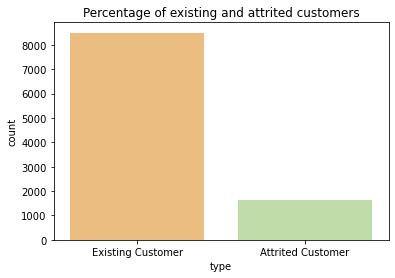

In [30]:

sns.barplot(x='type',y='count', data=mydata, palette='Spectral')
plt.title('Percentage of existing and attrited customers')

Note:
The distribution of gender for this bank is relatively equal, with there being only around 3% more women than men.

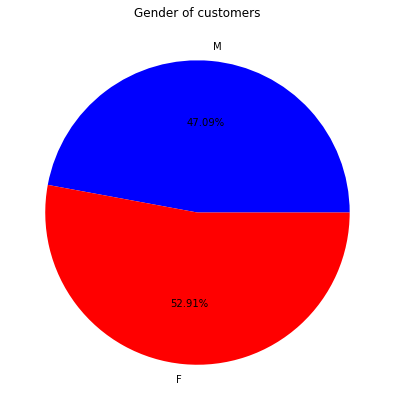

In [31]:
fig, ax = plt.subplots(figsize=(7, 7))
count = Counter(df2['Gender'])

ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%',colors ="br" )
ax.set_title('Gender of customers')
plt.show()

Note:
The vast majority of customers use blue cards, followed by Silver, Gold and then last Platinum.

<AxesSubplot:xlabel='Type', ylabel='Count'>

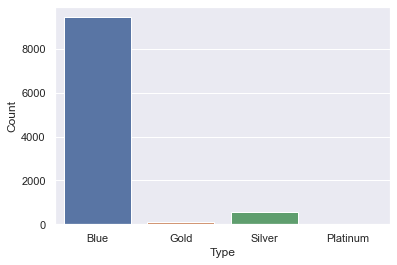

In [32]:
sns.set_theme(style="darkgrid")
count = Counter(df2['Card_Category'])
# sns.barplot(x=count.values(),y=count.keys(),palette='Spectral')
mydata2 = pd.DataFrame(count.items(),columns = ['Type','Count'])
sns.barplot(x = mydata2['Type'],y = mydata2['Count'])

### Feature Engineering

In [33]:
my_x = df3.drop(columns = ['Attrition_Flag'])
my_y = df3[['Attrition_Flag']]

In [34]:
bestfeatures = SelectKBest(score_func = chi2,k =10 )
fit = bestfeatures.fit(my_x,my_y)

In [35]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(my_x.columns)

In [36]:
featuresScores = pd.concat([dfcolumns,dfscores],axis = 1)

In [37]:
featuresScores.columns = ['Specs','Score']

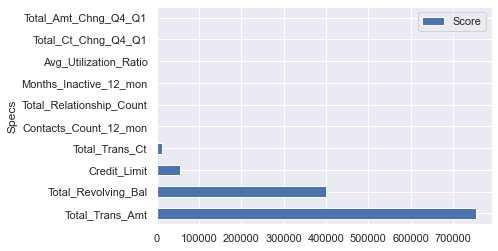

In [38]:
feature_imp = pd.DataFrame(featuresScores.nlargest(10,'Score')).set_index('Specs')
feature_imp.plot(kind = 'barh')
plt.show()

In [39]:
features = df3[['Total_Trans_Amt','Total_Revolving_Bal','Credit_Limit','Total_Trans_Ct','Contacts_Count_12_mon','Total_Relationship_Count','Months_Inactive_12_mon','Attrition_Flag']]

sns.pairplot(features,hue = 'Attrition_Flag')

Error in callback <function flush_figures at 0x0B5C4DF0> (for post_execute):


KeyboardInterrupt: 

In [40]:
df3.describe()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Single,Unknown,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown,Gold,Platinum,Silver
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,...,0.389355,0.073961,0.176755,0.138442,0.151575,0.351634,0.109805,0.011455,0.001975,0.054804
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,...,0.487628,0.261720,0.381480,0.345380,0.358626,0.477504,0.312663,0.106416,0.044398,0.227608
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
featuresScores.nlargest(10,'Score')

,Specs,Score
10,Total_Trans_Amt,754246.053313
7,Total_Revolving_Bal,400235.401723
6,Credit_Limit,55227.259276
11,Total_Trans_Ct,11865.365976
5,Contacts_Count_12_mon,211.039445
3,Total_Relationship_Count,144.398171
4,Months_Inactive_12_mon,102.667123
13,Avg_Utilization_Ratio,89.116891
12,Total_Ct_Chng_Q4_Q1,67.802873
9,Total_Amt_Chng_Q4_Q1,10.998295


In [42]:
x = df3[['Total_Trans_Amt','Total_Revolving_Bal','Credit_Limit','Total_Trans_Ct','Contacts_Count_12_mon','Total_Relationship_Count','Months_Inactive_12_mon','Avg_Utilization_Ratio','Total_Ct_Chng_Q4_Q1','Total_Amt_Chng_Q4_Q1']]
y = df3[['Attrition_Flag']]

In [234]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.35,random_state = 10)

### Model-1 Decision Tree

In [235]:
from sklearn import tree
model1 = tree.DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [236]:
y_predict = model1.predict(x_test)

In [237]:
from sklearn.metrics import classification_report,accuracy_score

In [238]:
print('Accuracy Score of model on testing data : {}'.format(accuracy_score(y_test,y_predict)))

Accuracy Score of model on testing data : 0.9455571227080395


In [239]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3004
           1       0.81      0.84      0.82       541

    accuracy                           0.95      3545
   macro avg       0.89      0.90      0.90      3545
weighted avg       0.95      0.95      0.95      3545



In [240]:
print('Cross_val_score: {}'.format(cross_val_score(model1, x_test, y_test).mean()))

Cross_val_score: 0.9354019746121297


In [241]:
print('roc_score: {}'.format(roc_auc_score(y_test, y_predict)))

roc_score: 0.9004346638246971


### Model-2 K Nearest Neighbors

In [242]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier

In [243]:
rmse = [] #root mean squared error
score = [] #Score of the model
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train,y_train)
    y_predict = knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,y_predict))
    model_score = knn.score(x_test,y_test)
    score.append(model_score)
    rmse.append(error)

In [244]:
myx = [i for i in range(1,15)]

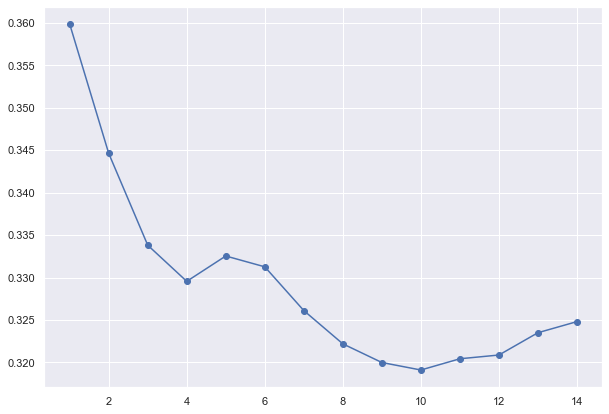

In [245]:
plt.figure(figsize = (10,7))
plt.plot(myx,rmse,marker = "o")

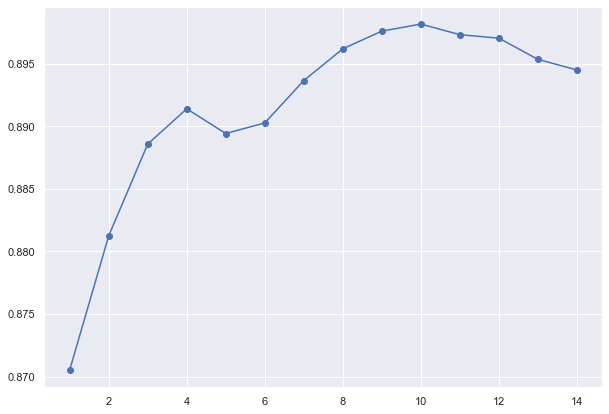

In [246]:
plt.figure(figsize = (10,7))
plt.plot(myx,score,marker = "o")

In [247]:
model2 = KNeighborsClassifier(n_neighbors= 10)
model2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [248]:
y_predict = model2.predict(x_test)

In [249]:
print('Accuracy Score of model on testing data : {}'.format(accuracy_score(y_test,y_predict)))

Accuracy Score of model on testing data : 0.8981664315937941


In [250]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3004
           1       0.74      0.52      0.61       541

    accuracy                           0.90      3545
   macro avg       0.83      0.74      0.77      3545
weighted avg       0.89      0.90      0.89      3545



In [251]:
print('Cross_val_score: {}'.format(cross_val_score(model2, x_test, y_test).mean()))

Cross_val_score: 0.8908321579689703


In [252]:
print('roc_score: {}'.format(roc_auc_score(y_test, y_predict)))

roc_score: 0.7413777932565576


### Model-3 Random Forest

In [253]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators = 14)
model3.fit(x_train,y_train)

RandomForestClassifier(n_estimators=14)

In [254]:
y_predict = model3.predict(x_test)

In [255]:
print('Accuracy Score of model on testing data : {}'.format(accuracy_score(y_test,y_predict)))

Accuracy Score of model on testing data : 0.9590973201692524


In [256]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3004
           1       0.91      0.81      0.86       541

    accuracy                           0.96      3545
   macro avg       0.94      0.90      0.92      3545
weighted avg       0.96      0.96      0.96      3545



In [257]:
print('Cross_val_score: {}'.format(cross_val_score(model3, x_test, y_test).mean()))

Cross_val_score: 0.9472496473906912


In [258]:
print('roc_score: {}'.format(roc_auc_score(y_test, y_predict)))

roc_score: 0.8978152358777329


Note :
    
    The Decision Tree and the Random Forest consistently crush the rest of the competition. However, through a small margin, 
    the winning model is the Random Forest. This predictor manages to achieve very high accuracies of 96%, 95%, and 94%.
    The Decision Tree achieves slightly lower than this, with 94%, 93% and 90%.
    Next is the K-Nearest Neighbours achieving 89%, 89% and 75%.